In [5]:
import os
from dotenv import load_dotenv
import requests
import praw
import time
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

load_dotenv()

CLIENT_ID = os.getenv('CLIENT_ID')
SECRET_KEY = os.getenv('SECRET_KEY')

In [6]:
reddit = praw.Reddit(client_id= CLIENT_ID,client_secret= SECRET_KEY, user_agent='Pred')

In [7]:
subreddits = ['ADHD','Anxiety','Bipolar','Depression','BPD', 'TRAUMATOOLBOX', 'MENTALHEALTHMEMES']

phrase = 'I am depressed, I am not happy, I am sucidal, I am sad, fight, anger'

In [8]:
arr = []

for i in range(len(subreddits)):
    
    top = reddit.subreddit(subreddits[i]).top(limit=1000)
    
    for post in top:
        entries =[]
        
        catchp_1 = model.encode(post.title, convert_to_tensor=True)
        catchp_2 = model.encode(phrase, convert_to_tensor=True)
        
        sim = float(util.pytorch_cos_sim(catchp_1, catchp_2))
        
        entries.append(post.title)
        entries.append(post.created_utc)
        entries.append(sim)
        entries.append(post.score)
        entries.append(post.subreddit)
        entries.append(post.url)
        
        arr.append(entries)            

In [9]:
# dataframe from the list arr
df = pd.DataFrame(arr, columns=['title', 'created_utc', 'similarity', 'score', 'subreddit', 'url'])

In [10]:
df.to_csv('data.csv', index=False)

Text(0.5, 1.0, 'Histogram of Similarity Scores')

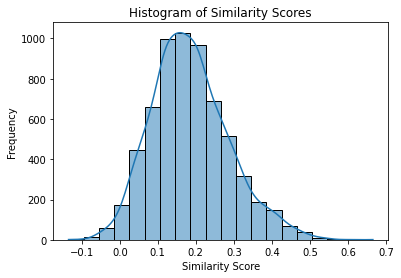

In [11]:
# histogram of the similarity scores vs the frequency of the scores using seaborn and label the axes and title the plot

sns.histplot(df['similarity'], kde=True, bins=20)
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Similarity Scores')

Text(0.5, 1.0, 'Similarity Scores vs Score')

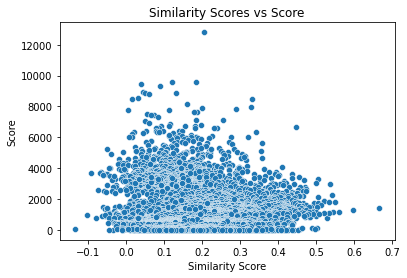

In [12]:
# graph of the similarity scores vs the score of the post using seaborn and label the axes and title the plot

sns.scatterplot(data=df, x='similarity', y='score')
plt.xlabel('Similarity Score')
plt.ylabel('Score')
plt.title('Similarity Scores vs Score')

In [13]:
# list with the unique subreddits and the mean similarity score for each subreddit and make a dataframe from the list

subreddits = df['subreddit'].unique()
means = []

for i in range(len(subreddits)):
    
    mean = df[df['subreddit'] == subreddits[i]]['similarity'].mean()
    
    means.append(mean)
    
sub_mean = pd.DataFrame(list(zip(subreddits, means)), columns=['subreddit', 'mean'])
sub_mean

,subreddit,mean
0,ADHD,0.135203
1,Anxiety,0.174475
2,bipolar,0.179715
3,depression,0.265203
4,BPD,0.166064
5,traumatoolbox,0.198463
6,mentalhealthmemes,0.178259


In [15]:
tester = input('Enter a phrase: ')

catchp_1 = model.encode(tester, convert_to_tensor=True)
catchp_2 = model.encode(phrase, convert_to_tensor=True)

sim = float(util.pytorch_cos_sim(catchp_1, catchp_2))
if sim > 0.3:
    print('This phrase is likely to be a cry for help')
    
else:
    print('This phrase is not likely to be a cry for help')

Enter a phrase: i am unhappy
This phrase is likely to be a cry for help
